In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

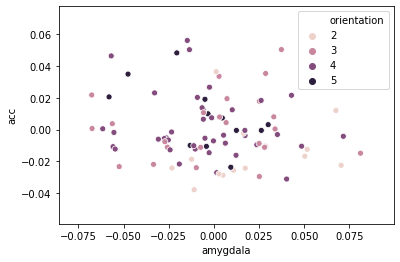

In [2]:
data = pd.read_csv("n90pol.csv")
#display(data)

sns.scatterplot(data=data, x='amygdala', y ='acc',hue="orientation")
plt.show()

The optimal choice for bandwidth h is:  0.013973984566878189
the the optimal number of bins is: 11


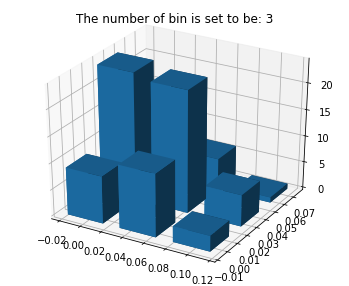

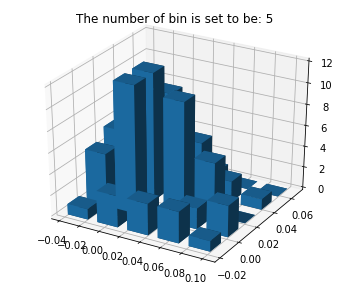

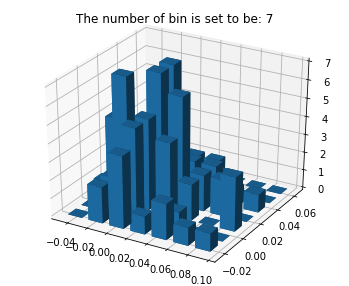

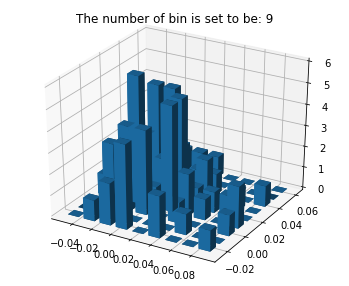

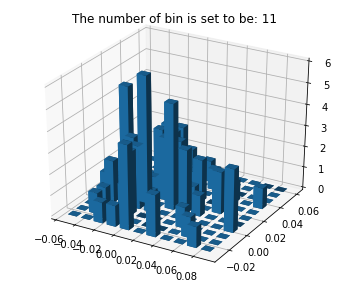

In [65]:
def Two_D_hist(data, bins=5):
    fig = plt.figure(figsize=(6,5))
    # create a 3d plot
    ax = fig.add_subplot(111, projection='3d')
    
    # get the count for each node of the x-y data with sepcified bins
    hist, xedges, yedges = np.histogram2d(data.iloc[:,0], data.iloc[:,1], bins, range=[[min(data["amygdala"]), max(data["amygdala"])], [min(data["acc"]), max(data["acc"])]])

    # make meshgrid and parameters for 3-d plot
    xpos, ypos = np.meshgrid(xedges[1:], yedges[1:])
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like (xpos)
    
    dx = np.abs(xedges [0]/bins*1.5)
    dy = np.abs(yedges [0]/bins*1.5)
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.set_title("The number of bin is set to be: "+str(bins))

    plt.show()

# Silvermanâ€™s rule of thumb
var = np.var(data["amygdala"])
h = 1.06*np.sqrt(var)*(len(data["amygdala"]))**(-0.2)
print ("The optimal choice for bandwidth h is: ", h )

# Thus the the optimal number of bins is: , can be calculated as follow:
bin_number = int(round((max(data["amygdala"])-min(data["amygdala"]))/h))
print ("the the optimal number of bins is:",bin_number )

for i in range(3,bin_number+1,2):
    Two_D_hist(data,i)

[9.35615555653066, 16.406491868772985, 16.86677872995006, 15.201860226178347, 16.678248285905, 7.168482322783898, 17.285692335733167, 13.318006208709496, 12.325678917381833, 8.767556709381378, 16.922811187114092, 12.617562080424035, 10.206610584841163, 16.613019548361432, 17.213152920102313, 15.747288532049861, 12.918366012909155, 9.746357012078349, 17.293599120288114, 16.92148623329456, 5.382473496259191, 9.59758173246262, 9.194981255511406, 16.955989131132956, 2.000886054030062, 15.428204214109547, 9.303796781408586, 17.177637207888534, 15.561567210387304, 16.955989131132956, 8.837896896126137, 5.077148144939283, 17.223089573580122, 13.017511679880956, 17.002093334600932, 17.307937184607653, 12.285732176256925, 16.87121762925091, 8.93449478837134, 16.613019548361432, 4.975000222100031, 2.94199383950342, 16.678248285905, 17.299947314286445, 9.780612025780558, 17.104649023399574, 2.690934262269595, 16.84775900245159, 16.478344480937952, 14.608068443535757, 15.335769910542648, 17.049977

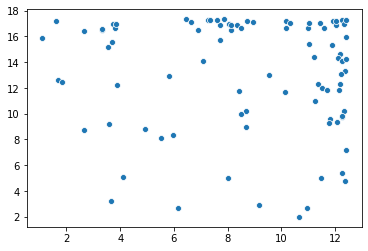

In [33]:
def guassian_kernel(x):
    return (1/np.sqrt(2*np.pi))*(np.e**((-x**2)/2))

def kde(x, x_all, h):
    pdf = 0
    for x_i in x_all:
        a = guassian_kernel((x_i-x)/h)/h
        pdf += a
    return pdf/len(x_all)

pdf_1 = []
for i in data['amygdala']:
    pdf_1.append(kde(i,data["amygdala"],h))
    
pdf_2 = []
for i in data['acc']:
    pdf_2.append(kde(i,data["acc"],h))
print (pdf_2)

sns.scatterplot(x=pdf_1,y=pdf_2)
plt.show()

In [44]:
import scipy.stats as st
kernel = st.gaussian_kde(data.iloc[:,0:2])
positions = np.vstack([data["amygdala"].ravel(), data["acc"].ravel()])
Z = np.reshape(kernel(positions.T), data.iloc[:,0:2].shape)

LinAlgError: 1-th leading minor of the array is not positive definite

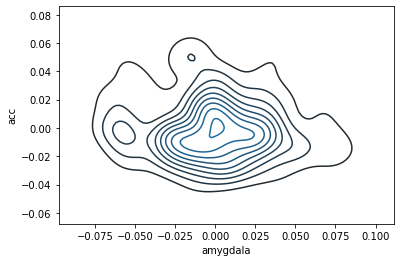

In [70]:
sns.kdeplot(data["amygdala"],data["acc"],bw=0.01)
plt.show()

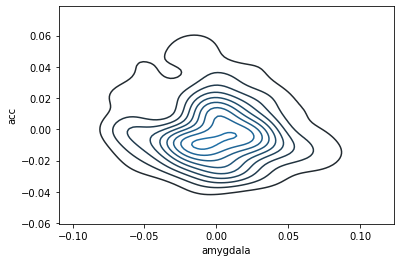

In [63]:
sns.kdeplot(data["amygdala"],data["acc"])
plt.show()